# Life expectancy and GDP. The data story.

## 1) Loading data and seeing the initial properties, variable etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
df = pd.read_csv('all_data.csv')

print(df.head())
print(df.dtypes)
print(df.describe())
print(df['Country'].unique())
df['Country'] = df['Country'].replace('United States of America', 'USA')
# get the entries from each country
df_countries = df['Country'].value_counts()
print(df_countries)


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000      

## 2) Plot some descriptive statistics:






### life expectancy for each country as line;

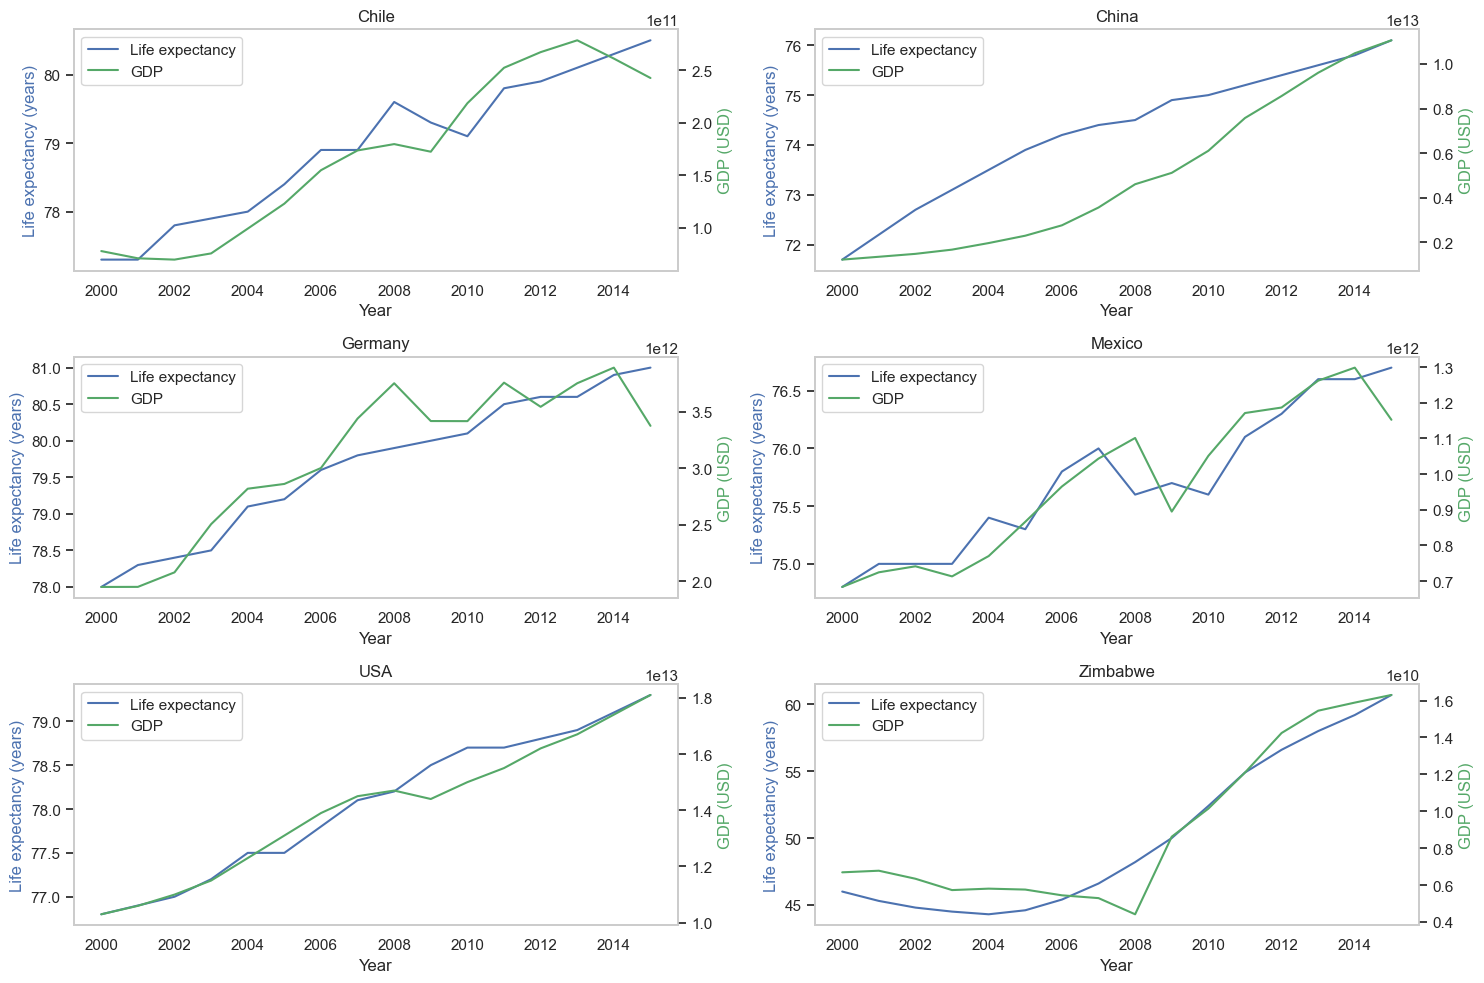

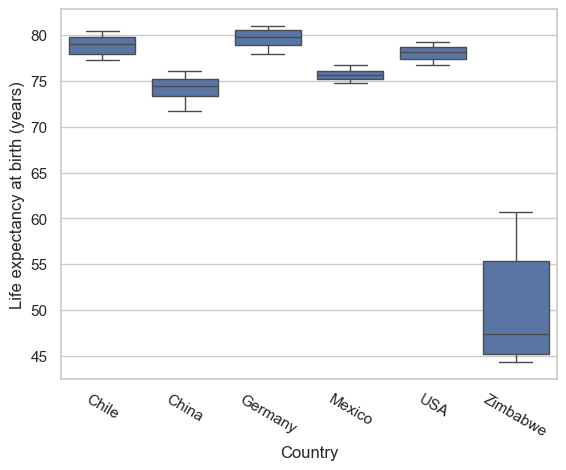

Pearson R for correlation between life expectancy and GDP:

country: Chile
Pearson R: 0.9498766659254417


country: China
Pearson R: 0.9085255408648355


country: Germany
Pearson R: 0.9326988982561274


country: Mexico
Pearson R: 0.9322377167847082


country: USA
Pearson R: 0.9817092382430256


country: Zimbabwe
Pearson R: 0.9661998955858779




In [56]:
countries = df['Country'].unique()

# Define number of countries and setup grid layout (adjust the number of rows/cols as needed)
num_countries = len(countries)
cols = 2  # Number of columns (you can adjust this)
rows = (num_countries // cols) + (num_countries % cols)  # Number of rows based on total countries

# Create a figure and axes for the subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten axes array to iterate easily

# Loop through each country and create subplots
for i, country in enumerate(countries):
    
    ax1 = axes[i]  # Access subplot axes
    ax2 = ax1.twinx()  # Create twin axes for GDP
    
    # Plot Life expectancy
    sns.lineplot(data=df[df['Country'] == country], x='Year', y='Life expectancy at birth (years)', ax=ax1, color='b', label='Life expectancy')
    
    # Plot GDP on secondary axis
    sns.lineplot(data=df[df['Country'] == country], x='Year', y='GDP', ax=ax2, color='g', label='GDP')

    # Set labels for each subplot
    ax1.set_ylabel('Life expectancy (years)', color='b')
    ax2.set_ylabel('GDP (USD)', color='g')
    ax1.set_xlabel('Year')

    # Title for each subplot
    ax1.set_title(f'{country}')
    
    # Combine legends
    ax1.legend().remove()
    ax2.legend().remove()
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    legend = ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
    legend.set_zorder(100)

    # Adjust grid
    ax1.grid(False)
    ax2.grid(False)

# Adjust layout and show the combined plot
plt.tight_layout()  # Prevent overlapping of subplots
plt.show()

sns.boxplot(data=df, x='Country', y='Life expectancy at birth (years)')
plt.xticks(rotation=330)
plt.show()

# correltaions
print('Pearson R for correlation between life expectancy and GDP:\n')
for country in countries:
    pearson_r = df[df['Country'] == country]['Life expectancy at birth (years)'].corr(df[df['Country'] == country]['GDP'])
    print(f'country: {country}\nPearson R: {pearson_r}\n\n')

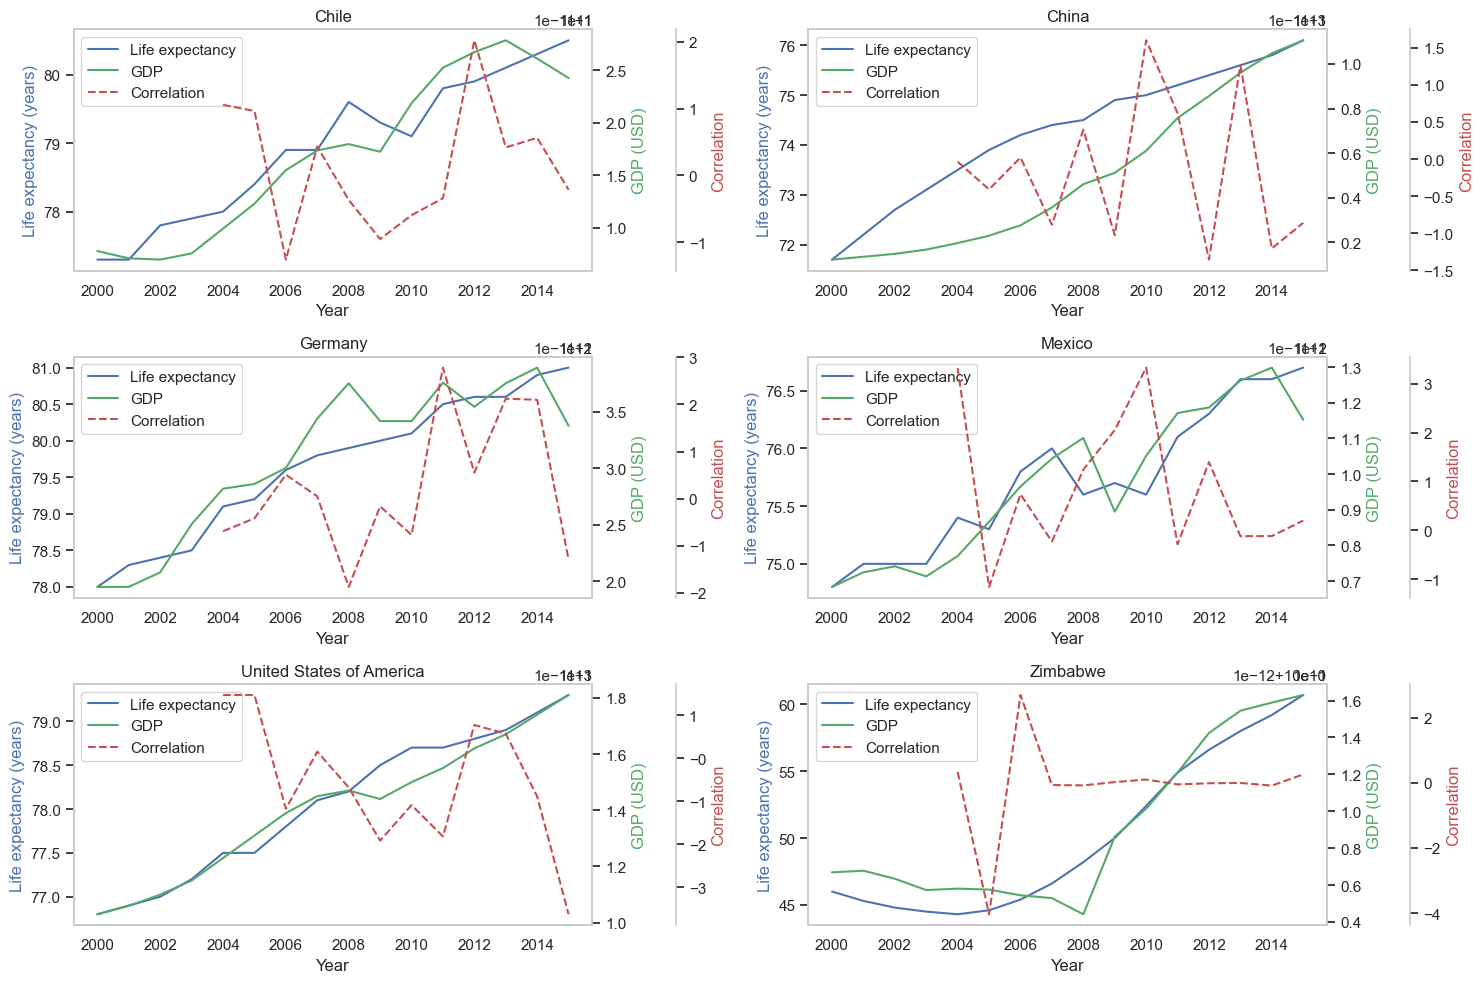

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define number of countries and setup grid layout
num_countries = len(countries)
cols = 2  # Number of columns
rows = (num_countries // cols) + (num_countries % cols)  # Number of rows based on total countries

# Create a figure and axes for the subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten axes array to iterate easily

# Loop through each country and create subplots
for i, country in enumerate(countries):
    
    # Filter data for the current country
    country_data = df[df['Country'] == country].sort_values(by='Year')

    # Compute rolling correlation between Life Expectancy and GDP over time
    window_size = 5  # Set window size for rolling correlation
    country_data['Correlation'] = country_data[['Life expectancy at birth (years)', 'GDP']].rolling(window=window_size).corr().unstack().iloc[:, 1]
    
    # Create the first axis for Life expectancy
    ax1 = axes[i]
    ax2 = ax1.twinx()  # Create twin axes for GDP
    
    # Plot Life expectancy
    sns.lineplot(data=country_data, x='Year', y='Life expectancy at birth (years)', ax=ax1, color='b', label='Life expectancy')
    
    # Plot GDP on secondary axis
    sns.lineplot(data=country_data, x='Year', y='GDP', ax=ax2, color='g', label='GDP')

    # Plot the rolling correlation on the third y-axis
    ax3 = ax1.twinx()
    ax3.spines.right.set_position(("outward", 60))  # Offset the third axis to prevent overlap
    sns.lineplot(data=country_data, x='Year', y='Correlation', ax=ax3, color='r', linestyle='--', label='Correlation')
    ax3.set_ylabel('Correlation', color='r')

    # Set labels for each subplot
    ax1.set_ylabel('Life expectancy (years)', color='b')
    ax2.set_ylabel('GDP (USD)', color='g')
    ax1.set_xlabel('Year')

    # Title for each subplot
    ax1.set_title(f'{country}')

    # Combine legends from all axes
    ax1.legend().remove()
    ax2.legend().remove()
    ax3.legend().remove()

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    lines_3, labels_3 = ax3.get_legend_handles_labels()
    
    # Create one unified legend and place it
    legend = ax1.legend(lines_1 + lines_2 + lines_3, labels_1 + labels_2 + labels_3, loc='upper left')
    legend.set_zorder(100)

    # Adjust grid
    ax1.grid(False)
    ax2.grid(False)
    ax3.grid(False)

# Adjust layout and show the combined plot
plt.tight_layout()  # Prevent overlapping of subplots
plt.show()


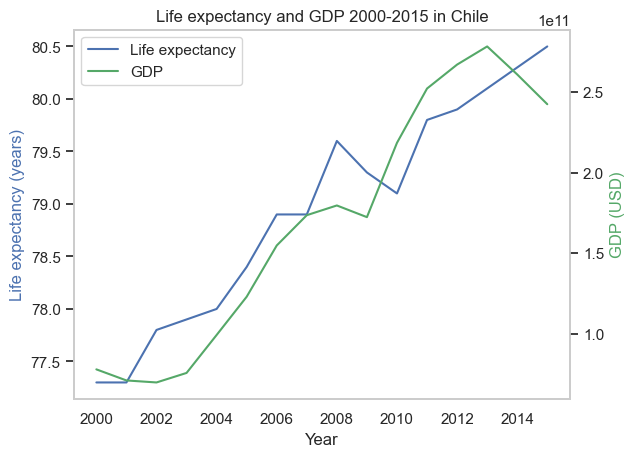

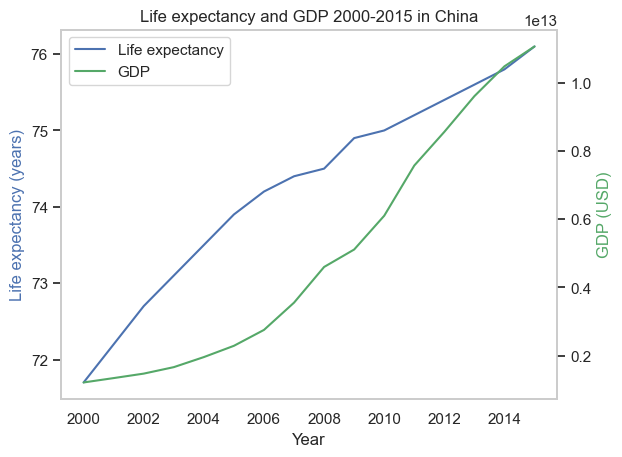

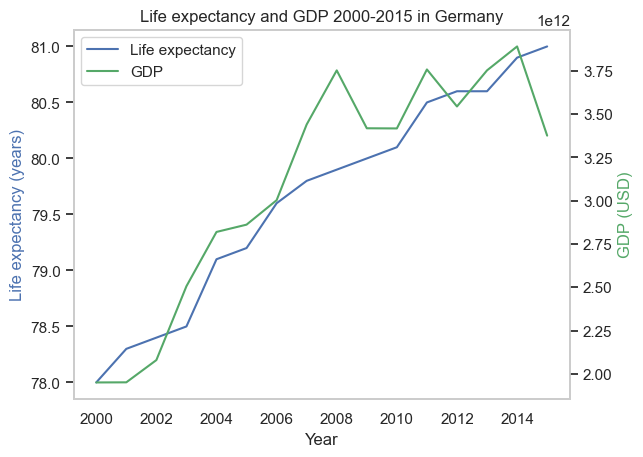

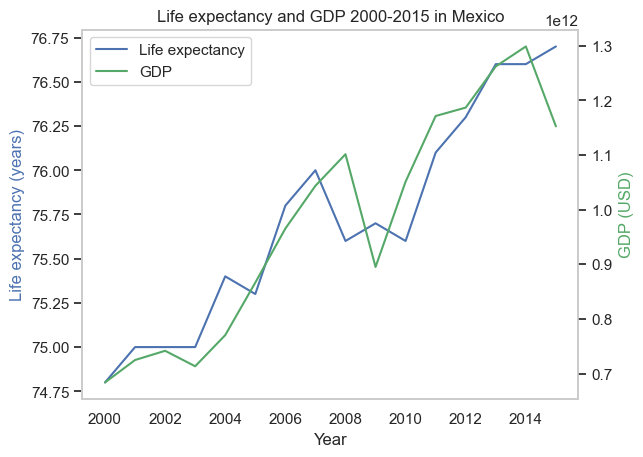

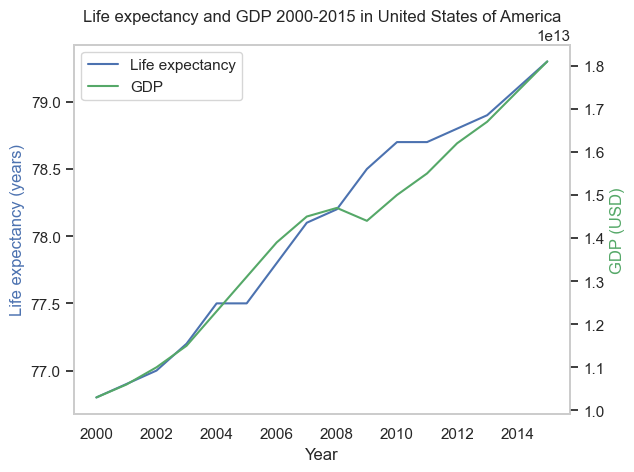

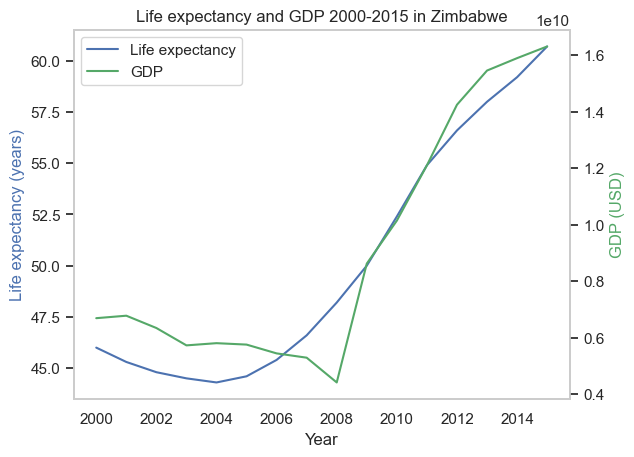

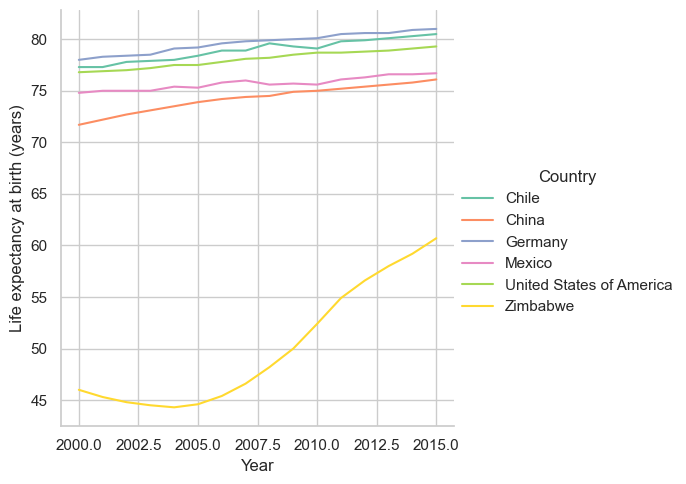

In [27]:
countries = df['Country'].unique()

for country in countries:
    # sns.relplot(data=df[df['Country'] == country], x='Year', y='Life expectancy at birth (years)', palette='Set2', kind='line')
    # sns.relplot(data=df[df['Country'] == country], x='Year', y='GDP', palette='Set2', kind='line')
    # plt.title(f'Life expectancy and GDP 2000-2015 in {country}')
    # plt.show()


    # Set plot style with Seaborn
    # sns.set_theme(style="whitegrid")

    # Create a figure and axis
    fig, ax1 = plt.subplots()

    # Plot the first line (Temperature) on the first y-axis
    sns.lineplot(data=df[df['Country'] == country], x='Year', y='Life expectancy at birth (years)', ax=ax1, color='b', label='Life expectancy')

    # Create a second y-axis sharing the same x-axis
    ax2 = ax1.twinx()

    # Plot the second line (Rainfall) on the second y-axis
    sns.lineplot(data=df[df['Country'] == country], x='Year', y='GDP', ax=ax2, color='g', label='GDP')

    # Set labels for the two y-axes
    ax1.set_ylabel('Life expectancy (years)', color='b')
    ax2.set_ylabel('GDP (USD)', color='g')



    # Title
    plt.title(f'Life expectancy and GDP 2000-2015 in {country}')

    # Combine legends from both axes
    ax1.legend().remove()
    ax2.legend().remove()
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()

    # Create one unified legend and place it
    legend = ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
    legend.set_zorder(100)

    ax1.grid(False)
    ax2.grid(False)

    # Show the plot
    plt.show()

# percentage change of gdp



sns.relplot(data=df, x='Year', y='Life expectancy at birth (years)', hue='Country', palette='Set2', kind='line')
plt.show()



### gdp for each country as line;



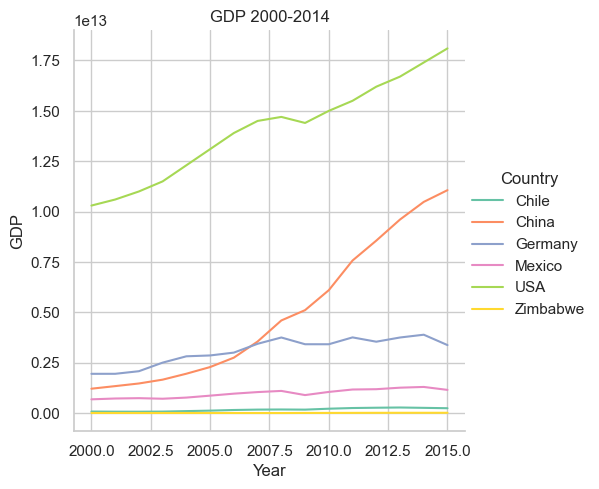

In [57]:
sns.relplot(data=df, x='Year', y='GDP', hue='Country', palette='Set2', kind='line')
plt.title('GDP 2000-2014')
plt.show()


### Distribution of all life expectancies



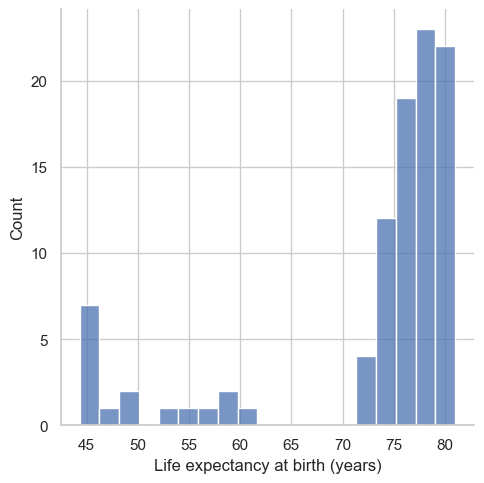

In [60]:
sns.displot(data=df, x='Life expectancy at birth (years)')


### some groupings

In [62]:
df_pivot_life = df.pivot(
    index='Year',
    columns='Country',
    values='Life expectancy at birth (years)'
)

print(df_pivot_life)

df_pivot_GDP = df.pivot(
    index='Year',
    columns='Country',
    values='GDP'
)

print(df_pivot_GDP)


Country  Chile  China  Germany  Mexico   USA  Zimbabwe
Year                                                  
2000      77.3   71.7     78.0    74.8  76.8      46.0
2001      77.3   72.2     78.3    75.0  76.9      45.3
2002      77.8   72.7     78.4    75.0  77.0      44.8
2003      77.9   73.1     78.5    75.0  77.2      44.5
2004      78.0   73.5     79.1    75.4  77.5      44.3
2005      78.4   73.9     79.2    75.3  77.5      44.6
2006      78.9   74.2     79.6    75.8  77.8      45.4
2007      78.9   74.4     79.8    76.0  78.1      46.6
2008      79.6   74.5     79.9    75.6  78.2      48.2
2009      79.3   74.9     80.0    75.7  78.5      50.0
2010      79.1   75.0     80.1    75.6  78.7      52.4
2011      79.8   75.2     80.5    76.1  78.7      54.9
2012      79.9   75.4     80.6    76.3  78.8      56.6
2013      80.1   75.6     80.6    76.6  78.9      58.0
2014      80.3   75.8     80.9    76.6  79.1      59.2
2015      80.5   76.1     81.0    76.7  79.3      60.7
Country   